In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("rocData.csv")

In [3]:
df.head()

,0,0.1
0,0.00,0.265
1,0.01,0.510
2,0.02,0.565
3,0.03,0.605
4,0.04,0.625


In [4]:
df.columns = ['P_FA', 'P_D']

In [5]:
df.head()

,P_FA,P_D
0,0.00,0.265
1,0.01,0.510
2,0.02,0.565
3,0.03,0.605
4,0.04,0.625


In [6]:
accuracy = np.trapz(df['P_D'],df['P_FA'])
accuracy

0.916575

In [7]:
P_cd1_series = 0.5 * df['P_D'] + 0.5 * (1 - df['P_FA'])
P_cd2_series = 2/3 * df['P_D'] + 1/3 * (1 - df['P_FA'])
P_cd3_series = 1/3 * df['P_D'] + 2/3 * (1 - df['P_FA'])
P_cd1_maxvalue = P_cd1_series.max()
P_cd2_maxvalue = P_cd2_series.max()
P_cd3_maxvalue = P_cd3_series.max()
P_cd1_max = P_cd1_series.idxmax()
P_cd2_max = P_cd2_series.idxmax()
P_cd3_max = P_cd3_series.idxmax()

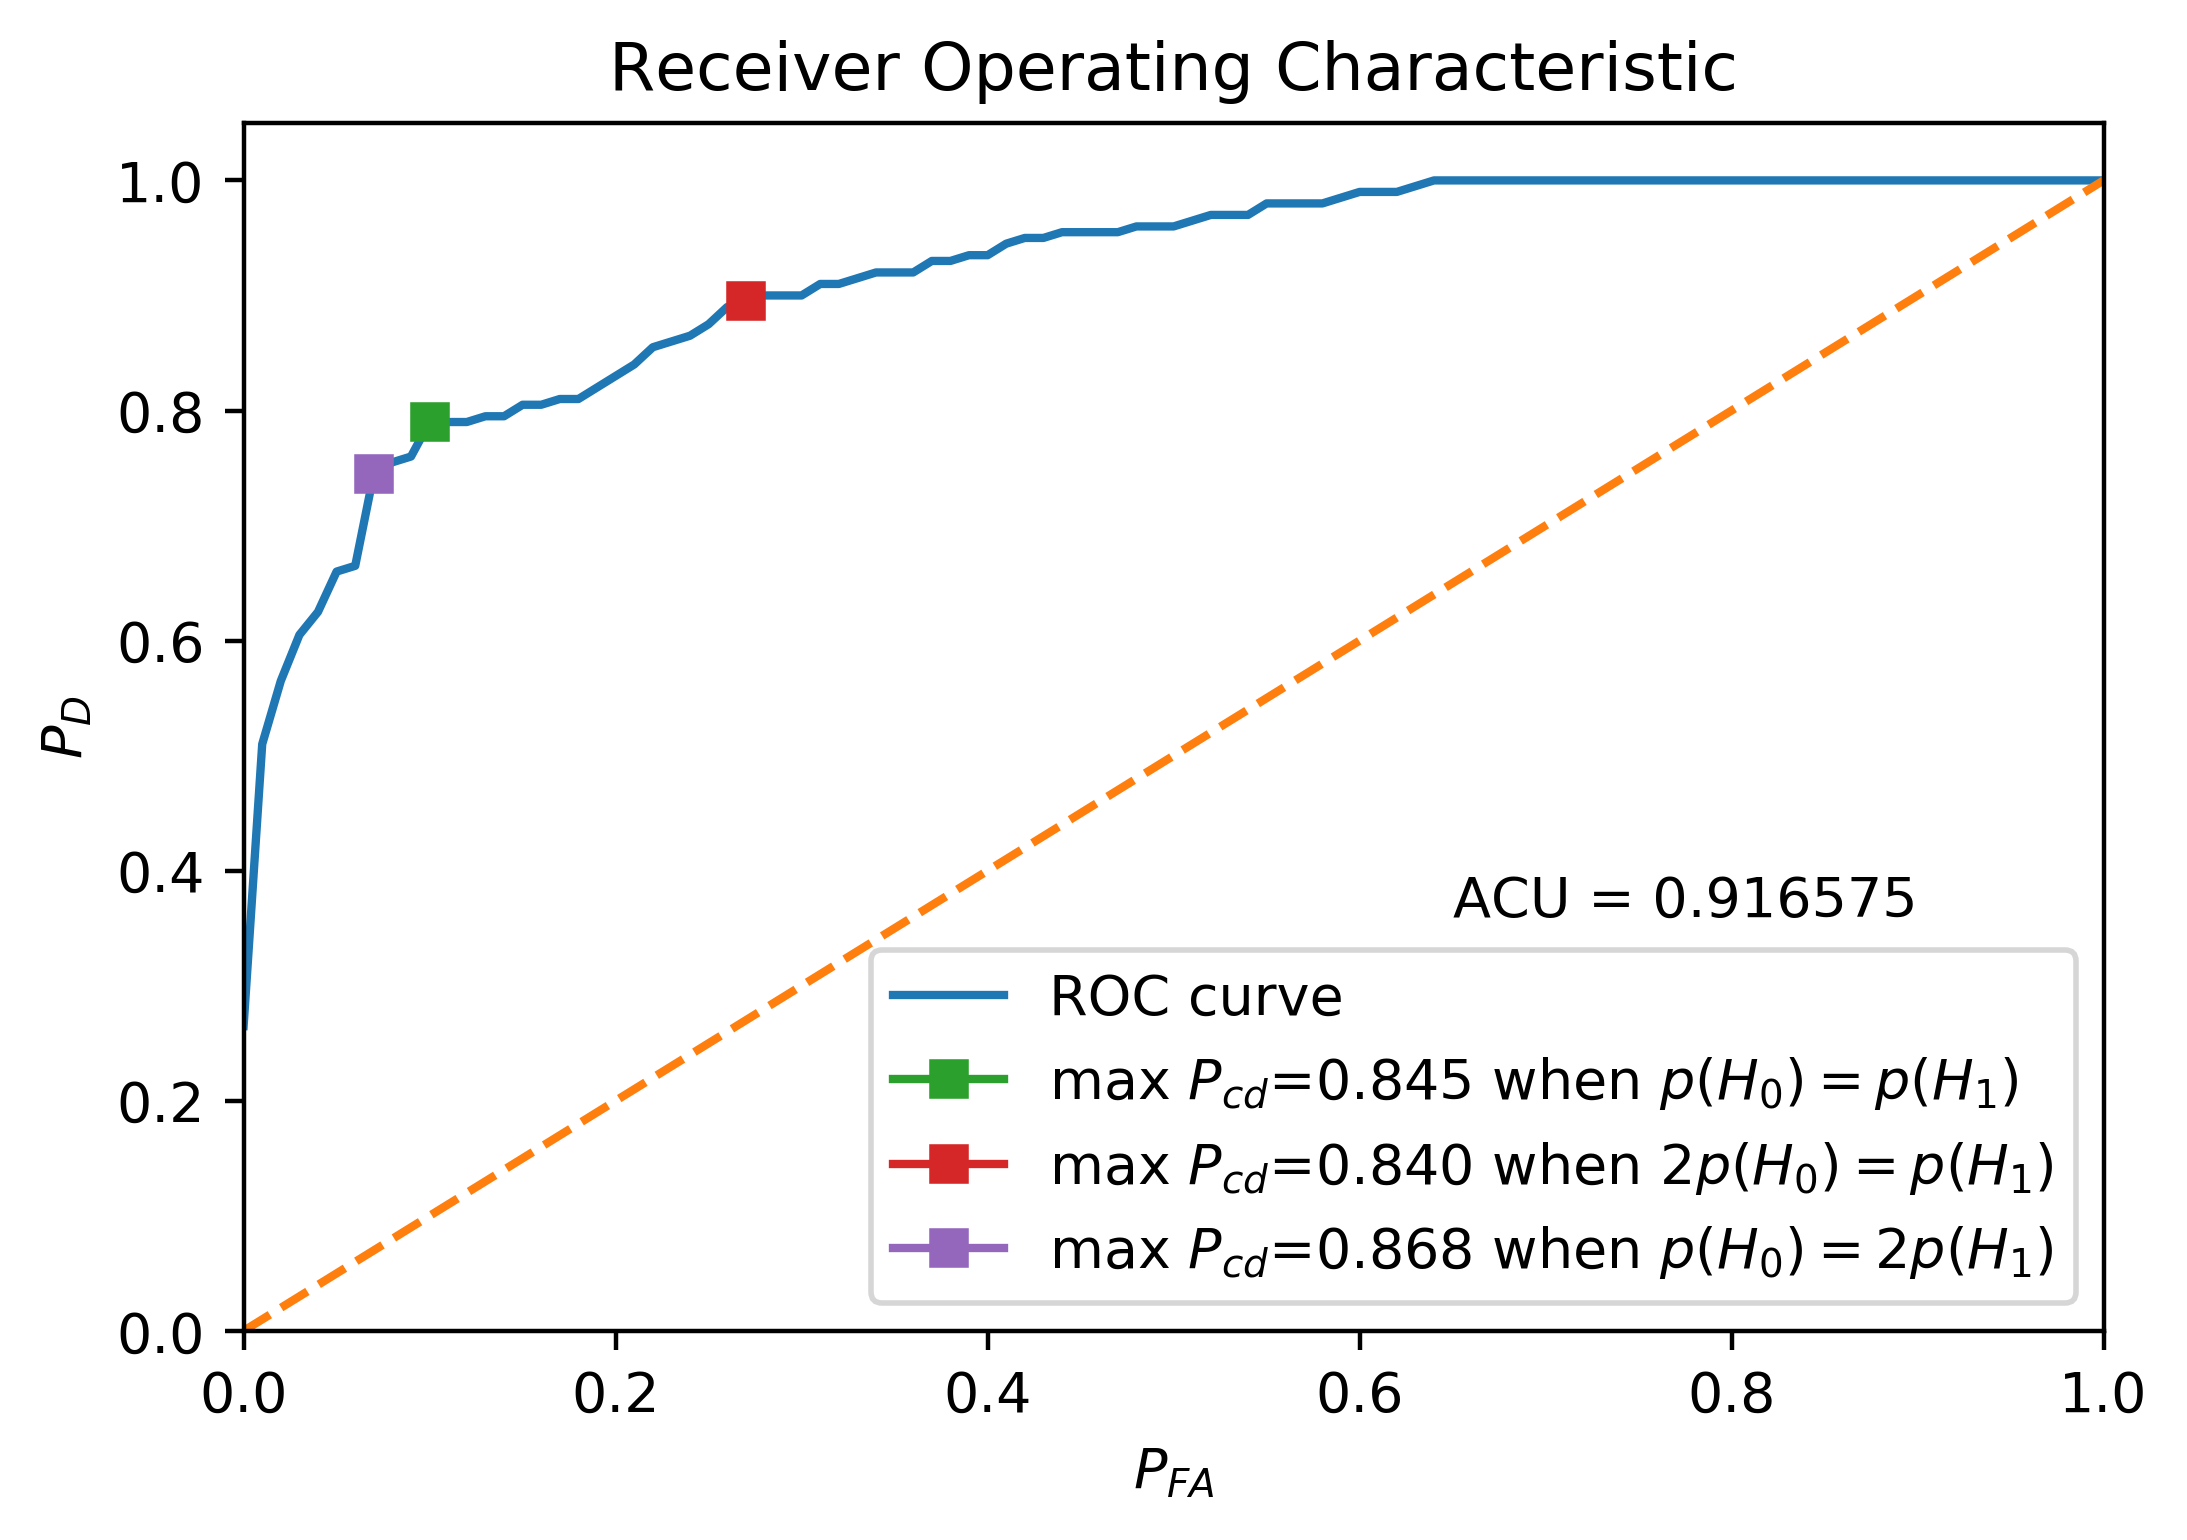

In [9]:
plt.figure(dpi=400)
plt.plot(df['P_FA'],df['P_D'],label='ROC curve')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.text(0.65,0.36,"ACU = {}".format(accuracy))
plt.plot(df['P_FA'][P_cd1_max], df['P_D'][P_cd1_max], marker='s',label='max $P_{cd}$=%.3f when $p(H_0)=p(H_1)$' %P_cd1_maxvalue)
plt.plot(df['P_FA'][P_cd2_max], df['P_D'][P_cd2_max], marker='s',label='max $P_{cd}$=%.3f when $2p(H_0)=p(H_1)$' %P_cd2_maxvalue)
plt.plot(df['P_FA'][P_cd3_max], df['P_D'][P_cd3_max], marker='s',label='max $P_{cd}$=%.3f when $p(H_0)=2p(H_1)$' %P_cd3_maxvalue)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('$P_{FA}$')
plt.ylabel('$P_D$')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()